# Analiza LEGO setov 
Analizirajmo podatke iz datoteke _podatki.csv_.
Delovne hipoteze so:
- večina izdelkov je na zalogi,
- povprečna cena izdelka je 150€,
- povprečna ocena izdelkov je višja od 4,
- izdelki, ki jih ni na zalogi so povprečno dražji in bolje ocenjeni od ostalih.

In [12]:
import pandas as pd
legoti = pd.read_csv("Datoteke/podatki.csv", index_col="id")

In [13]:
legoti

,ime,ocena,zaloga,cena
id,,,,
10255,Assembly Square,4.7675,True,25999
10265,Ford Mustang,4.8075,True,14999
10266,NASA Apollo 11 Lunar Lander,4.8272,True,8999
10270,Bookshop,4.2209,True,16999
10271,Fiat 500,4.2455,True,6999
...,...,...,...,...
88015,Battery Box,2.0000,True,2999
88016,Large Hub,5.0000,True,20999
88017,Large Angular Motor,NaN,True,2999


Zgoraj je za orientacijo prikazana tabela vseh setov.

In [14]:
na_zalogi = legoti[legoti.zaloga == True]
ni_na_zalogi = legoti[legoti.zaloga == False]
legoti.groupby("zaloga").size()

zaloga
False     232
True     1002
dtype: int64

<AxesSubplot: xlabel='zaloga'>

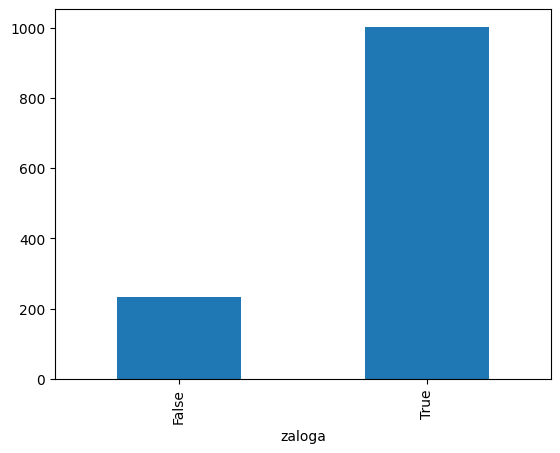

In [15]:

legoti.groupby("zaloga").size().plot.bar()

Če podatke prefiltriramo glede na to, če so v zalogi ali ne, opazimo, da je sta na zalogi 1002 seta izmed 1234 setov. To pomeni, da večina setov v spletni trgovini res *je* na zalogi. Tudi na zgornjem stolpičnem prikazu je lepo vidno, da je večina izdelkov na zalogi.

In [16]:
round(0.01 * legoti.cena.mean(), 2)

50.02

Preprost izračun povprečja cen pokaže, da je povprečna cena LEGO seta v spletni trgovini 50.02 €, kar je le tretjina cene predvidene v hipotezi (150 €). Oceno v hipotezi smo torej postavili previsoko.

In [17]:
round(legoti.ocena.mean(), 2)

4.5

Podobno lahko izračunamo tudi povprečno oceno LEGO setov in vidimo, da je le-ta 4.5, torej je res višja od 4.

In [18]:
a = round(0.01 * ni_na_zalogi.cena.mean(), 2)
b = round(0.01 * na_zalogi.cena.mean(), 2)
a, b

(48.1, 50.47)

In [19]:
c = round(ni_na_zalogi.ocena.mean(), 2)
d = round(na_zalogi.ocena.mean(), 2)
c, d

(4.49, 4.5)

Podatke o povprečni ceni in oceni izračunamo še posebej na setih, ki so oz. niso na zalogi. V nasprotju s hipotezo je povprečna cena izdelkov, ki jih ni na zalogi, nižja od skupnega povprečja, prav tako je povprečna ocena rahlo nižja od skupne povprečne ocene.
Cene izdelkov na zalogi pa so posledično nekoliko višje od skupnega povprečja.